# Adjust transparency based on brightness

In [88]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

resize_degree = 1

img = Image.open("testimg1.jpeg")

img = img.resize((int(img.size[0]*(resize_degree)), int(img.size[1]*(resize_degree))))

# rgba data of origin img
imgData = img.convert("RGBA")

# put in numpy array
imgData_np = np.array(imgData)

# grayscaling
gray_L = img.convert("L")

# after grayscale, convert RGBA
gray_RGBA = gray.convert("RGBA")

# gray_RGBA in numpy array
gray_RGBA_np = np.array(gray_RGBA)

# put in numpy array
gray_np = np.array(gray)

가로 픽셀: 4032
세로 픽셀: 3024
변형을 진행할 총 픽셀 수: 12192768


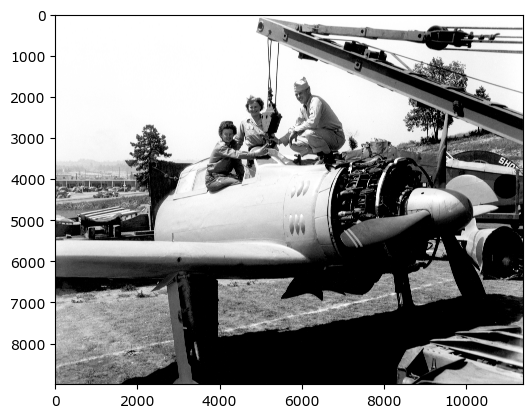

In [89]:
allpixel_amount = gray.width * gray.height # number of pixels to process
print('가로 픽셀: ' + str(gray.width) + '\n세로 픽셀: ' + str(gray.height) 
      + '\n변형을 진행할 총 픽셀 수: ' + str(gray.width * gray.height))

plt.imshow(imgData)

In [82]:
print(gray_RGBA_np)

[[[108 108 108 255]
  [107 107 107 255]
  [110 110 110 255]
  ...
  [ 30  30  30 255]
  [ 26  26  26 255]
  [ 28  28  28 255]]

 [[110 110 110 255]
  [111 111 111 255]
  [111 111 111 255]
  ...
  [ 27  27  27 255]
  [ 24  24  24 255]
  [ 27  27  27 255]]

 [[110 110 110 255]
  [113 113 113 255]
  [113 113 113 255]
  ...
  [ 30  30  30 255]
  [ 23  23  23 255]
  [ 21  21  21 255]]

 ...

 [[123 123 123 255]
  [121 121 121 255]
  [119 119 119 255]
  ...
  [ 18  18  18 255]
  [ 23  23  23 255]
  [ 21  21  21 255]]

 [[122 122 122 255]
  [123 123 123 255]
  [118 118 118 255]
  ...
  [ 14  14  14 255]
  [ 20  20  20 255]
  [ 18  18  18 255]]

 [[123 123 123 255]
  [125 125 125 255]
  [120 120 120 255]
  ...
  [ 11  11  11 255]
  [ 18  18  18 255]
  [ 20  20  20 255]]]


In [83]:
# 그레이스케일 된 이미지를 numpy array로 변환하자마자 다시 그레이스케일 이미지로 바꾸는 테스트
originImg = Image.fromarray(gray_np, "L")
originImg.save('originImg.png', 'png')

In [84]:
# save brightness of pixels in numpy array
brightness_values = np.array(gray).flatten()

print("Brightness values: ", brightness_values)

Brightness values:  [108 107 110 ...  11  18  20]


In [85]:
# img processing
from tqdm import tqdm # indicate progression degree module

newData = gray_RGBA_np

pixel_pos = 0 # now pixel position (flatten index)

print('start.')

# img Alpha change and save
for i in tqdm(range(gray_RGBA_np.shape[0])):
    for j in range(gray_RGBA_np.shape[1]):
        #print(str(pixel_pos))
        newData[i, j, 3] = brightness_values[pixel_pos]
        pixel_pos = pixel_pos + 1 # count

#newData = newData.astype("uint8") <- 그레이스케일 이미지는 필요 없음
edited_img = Image.fromarray(newData, "RGBA")

# grayscale while maintaining transparency
edited_img = edited_img.rotate(270, expand=1)
print("end processing. \n\n")
print("[result]\n" + str(newData))

start.


100%|█████████████████████████████████████| 3024/3024 [00:02<00:00, 1186.24it/s]

end processing. 


[result]
[[[108 108 108 108]
  [107 107 107 107]
  [110 110 110 110]
  ...
  [ 30  30  30  30]
  [ 26  26  26  26]
  [ 28  28  28  28]]

 [[110 110 110 110]
  [111 111 111 111]
  [111 111 111 111]
  ...
  [ 27  27  27  27]
  [ 24  24  24  24]
  [ 27  27  27  27]]

 [[110 110 110 110]
  [113 113 113 113]
  [113 113 113 113]
  ...
  [ 30  30  30  30]
  [ 23  23  23  23]
  [ 21  21  21  21]]

 ...

 [[123 123 123 123]
  [121 121 121 121]
  [119 119 119 119]
  ...
  [ 18  18  18  18]
  [ 23  23  23  23]
  [ 21  21  21  21]]

 [[122 122 122 122]
  [123 123 123 123]
  [118 118 118 118]
  ...
  [ 14  14  14  14]
  [ 20  20  20  20]
  [ 18  18  18  18]]

 [[123 123 123 123]
  [125 125 125 125]
  [120 120 120 120]
  ...
  [ 11  11  11  11]
  [ 18  18  18  18]
  [ 20  20  20  20]]]


In [86]:
# save edited img
edited_img.save('edited_img1.png', 'png')

print('saved.')

saved.
